In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [37]:
df = pd.DataFrame(columns=['x','y'])
df.loc[len(df)] = {'x':0,'y':0}

In [38]:
TEST_INPUT = '''R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)'''.splitlines()

In [39]:
# with open("day18.txt") as f:
#     TEST_INPUT = f.read().splitlines()
# len(TEST_INPUT)

In [40]:
for line in TEST_INPUT:
    line = line.split(' ')
    color = line[2].strip('()#')
    current_coords = df.loc[len(df)-1]
    direction = color[-1]
    length = int(color[:-1],16)
    if direction=='0':
        df.loc[len(df)] = {'x':(current_coords.x+length),'y':current_coords.y}
    elif direction == '3':
        df.loc[len(df)] = {'x':(current_coords.x),'y':current_coords.y+length}
    elif direction == '1':
        df.loc[len(df)] = {'x':(current_coords.x),'y':current_coords.y-length}
    elif direction == '2':
        df.loc[len(df)] = {'x':(current_coords.x-length),'y':current_coords.y,'color':color}
# df = df.drop_duplicates(subset=['x','y'],keep='last')

In [41]:
# df = df.sort_values(by=['x','y'],ascending=[True,False]).reset_index(drop=True)

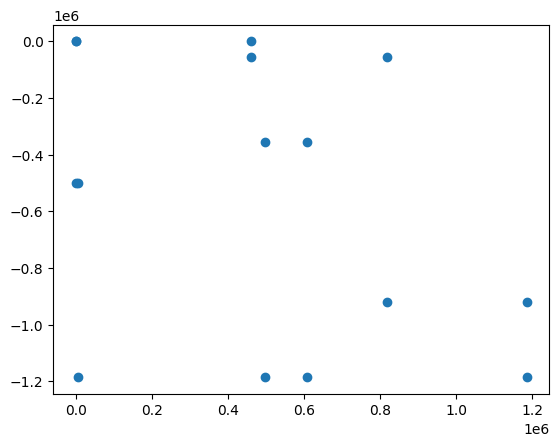

In [42]:
fig, ax = plt.subplots()
ax.scatter(df.x,df.y)
plt.show()

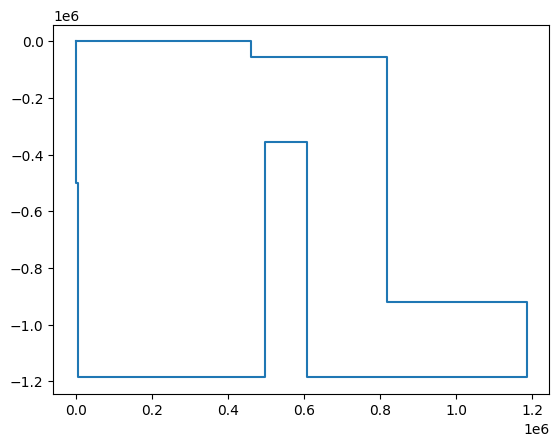

In [43]:
polygon = Polygon(list(zip(df.x, df.y)))
plt.plot(*polygon.exterior.xy)

In [47]:
# length(polygon.interiors.coords)+length(polygon.exterior.coords)

15

In [ ]:
for y in range(df.min().y - 1,df.max().y + 1):
    for x in range(df.min().x - 1,df.max().x + 1):
        if polygon.contains(Point(x,y)):
            df.loc[len(df)] = {'x':x,'y':y,'color':'0'}
            
df = df.drop_duplicates(subset=['x','y'],keep='last')
print(len(df))

KeyboardInterrupt: 

In [ ]:
df = df.drop_duplicates(subset=['x','y'],keep='last')
print(len(df))

40745


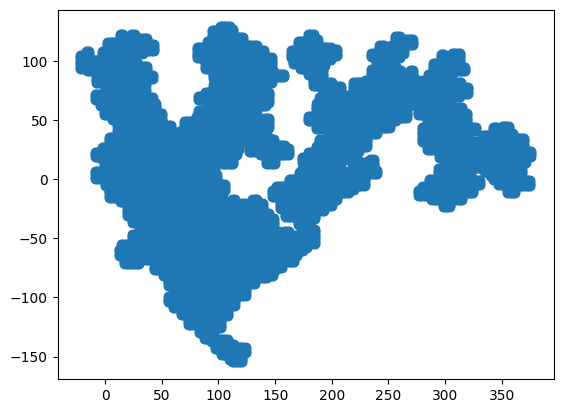

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df.x,df.y)
plt.show()